# 勾配ブースティング

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# 訓練データに回帰モデルを当てはめる
実験用のデータを作成します、三角関数を足し合わせた波形のデータを用意します。

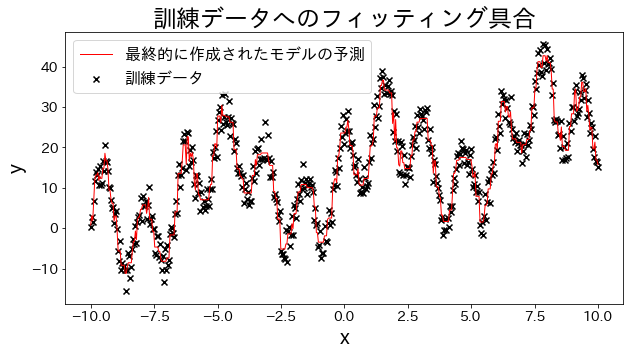

In [4]:
# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]
noise = np.random.rand(X.shape[0]) * 10

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)

# 回帰モデルを作成
reg = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.5,
)
reg.fit(X, y)
y_pred = reg.predict(X)

# 訓練データへのフィッティング具合を確認する
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c="k", marker="x", label="訓練データ")
plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("訓練データへのフィッティング具合")
plt.legend()
plt.show()

## 損失関数の結果への影響
loss を ["squared_error", "absolute_error", "huber", "quantile"] と変えた場合、訓練データへのフィッティングがどのように変化するかを確認。
"absolute_error", "huber"は二乗誤差ほど外れ値へのペナルティが大きくないので、外れ値を予測しに行かないです。

- [sklearn/ensemble/_gb_losses.py](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/ensemble/_gb_losses.py)
- [sklearn.ensemble.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

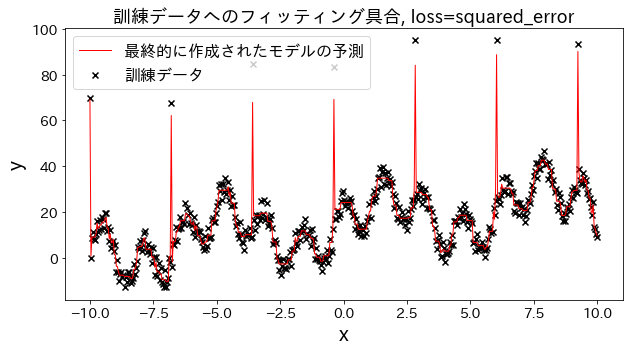

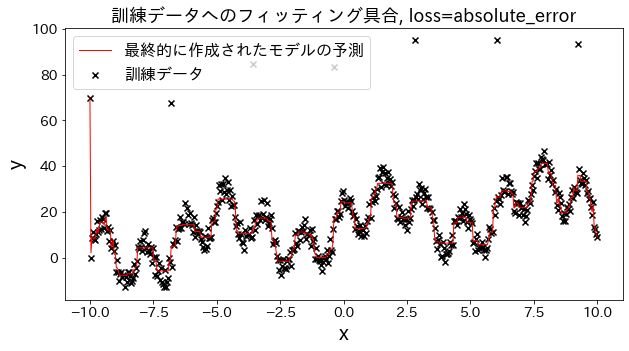

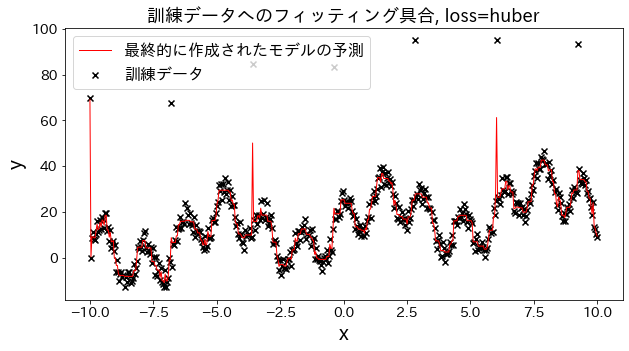

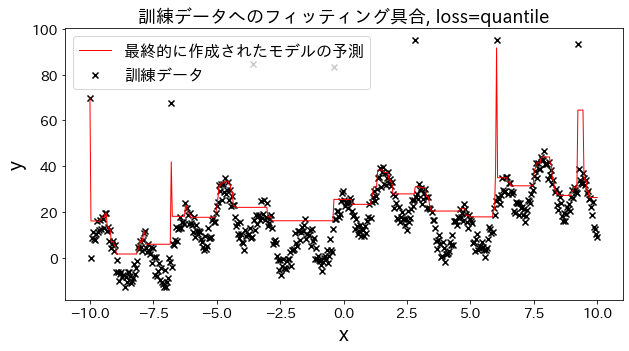

In [5]:
# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]

# 外れ値を用意
noise = np.random.rand(X.shape[0]) * 10
for i, ni in enumerate(noise):
    if i % 80 == 0:
        noise[i] = 70 + np.random.randint(-10, 10)

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)

for loss in ["squared_error", "absolute_error", "huber", "quantile"]:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.5,
        loss=loss,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # 訓練データへのフィッティング具合を確認する
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, c="k", marker="x", label="訓練データ")
    plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"訓練データへのフィッティング具合, loss={loss}", fontsize=18)
    plt.legend()
    plt.show()

## n_estimatorsの結果への影響
ある程度 `n_estimators`を大きくすると、改善度合いは頭打ちになる様子が確認できます。

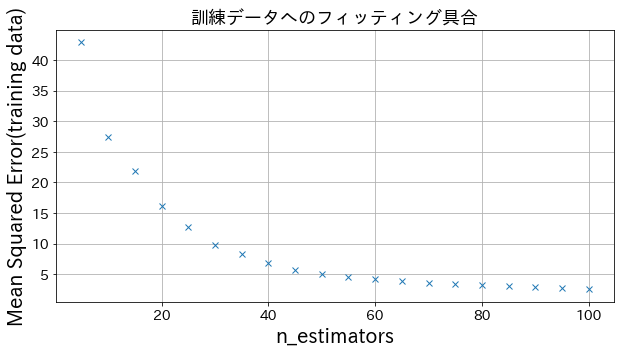

In [6]:
from sklearn.metrics import mean_squared_error as MSE

# 訓練データ
X = np.linspace(-10, 10, 500)[:, np.newaxis]
noise = np.random.rand(X.shape[0]) * 10

# 目的変数
y = (
    (np.sin(X).ravel() + np.cos(4 * X).ravel()) * 10
    + 10
    + np.linspace(-10, 10, 500)
    + noise
)


# n_estimatorsを変えてモデルを作成してみる
n_estimators_list = [(i + 1) * 5 for i in range(20)]
mses = []
for n_estimators in n_estimators_list:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=0.3,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)
    mses.append(MSE(y, y_pred))

# n_estimatorsを変えた時のmean_squared_errorをプロット
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, mses, "x")
plt.xlabel("n_estimators")
plt.ylabel("Mean Squared Error(training data)")
plt.title(f"訓練データへのフィッティング具合", fontsize=18)
plt.grid()
plt.show()

## learning_rateの結果への影響
小さすぎると精度が良くならない、大きすぎると収束しない様子が確認できます。

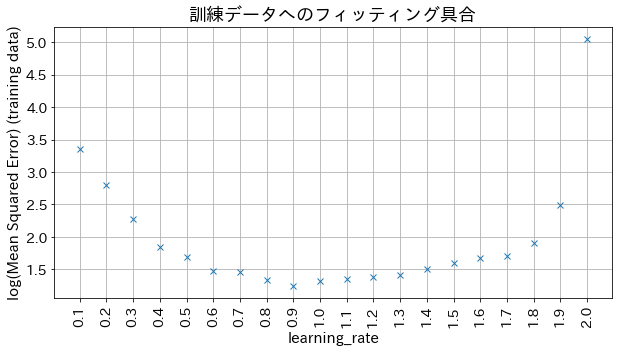

In [7]:
# n_estimatorsを変えてモデルを作成してみる
learning_rate_list = [np.round(0.1 * (i + 1), 1) for i in range(20)]
mses = []
for learning_rate in learning_rate_list:
    # 回帰モデルを作成
    reg = GradientBoostingRegressor(
        n_estimators=30,
        learning_rate=learning_rate,
    )
    reg.fit(X, y)
    y_pred = reg.predict(X)
    mses.append(np.log(MSE(y, y_pred)))

# n_estimatorsを変えた時のmean_squared_errorをプロット
plt.figure(figsize=(10, 5))
plt_index = [i for i in range(len(learning_rate_list))]
plt.plot(plt_index, mses, "x")
plt.xticks(plt_index, learning_rate_list, rotation=90)
plt.xlabel("learning_rate", fontsize=15)
plt.ylabel("log(Mean Squared Error) (training data)", fontsize=15)
plt.title(f"訓練データへのフィッティング具合", fontsize=18)
plt.grid()
plt.show()